### Importing Libraries


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import sys
import warnings
warnings.filterwarnings("ignore")

In [0]:
dataset = pd.read_csv('train_sms_mine.csv')

In [3]:
dataset.head

<bound method NDFrame.head of              Label                                            Message
0         Delivery  Dear Guest, Thanks for choosing The Edison. Or...
1            Hotel  Welcome to Southern University at Shreveport R...
2          Payment  Bill dated 2013-01-14 for Rs 626 has been gene...
3          Payment  Bill dated 2014-11-30 for Rs 323 has been gene...
4      Appointment  DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE...
...            ...                                                ...
42003         bill  Bill Payment From: Waqas Amount: SAR 9,000 Bil...
42004         bill  Bill Payment From: Waqas Amount: Re 600.63 Bil...
42005         bill  Bill Payment From: Waqas Amount: SAR 9,938.63 ...
42006         bill  Bill Payment From: Waqas Amount: RS 9,938.63 B...
42007         bill  Bill Payment From: Ahmed Amount: RS 9,938.63 B...

[42008 rows x 2 columns]>

In [4]:
dataset['Label'].head

<bound method NDFrame.head of 0           Delivery
1              Hotel
2            Payment
3            Payment
4        Appointment
            ...     
42003           bill
42004           bill
42005           bill
42006           bill
42007           bill
Name: Label, Length: 42008, dtype: object>

#### Managing Dataset

In [0]:
data = pd.DataFrame(columns=['Text','Label','Hot_Encoded'])
data['Text'] = dataset['Message']
data['Label'] = dataset['Label']

In [6]:
data.head

<bound method NDFrame.head of                                                     Text  ... Hot_Encoded
0      Dear Guest, Thanks for choosing The Edison. Or...  ...         NaN
1      Welcome to Southern University at Shreveport R...  ...         NaN
2      Bill dated 2013-01-14 for Rs 626 has been gene...  ...         NaN
3      Bill dated 2014-11-30 for Rs 323 has been gene...  ...         NaN
4      DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE...  ...         NaN
...                                                  ...  ...         ...
42003  Bill Payment From: Waqas Amount: SAR 9,000 Bil...  ...         NaN
42004  Bill Payment From: Waqas Amount: Re 600.63 Bil...  ...         NaN
42005  Bill Payment From: Waqas Amount: SAR 9,938.63 ...  ...         NaN
42006  Bill Payment From: Waqas Amount: RS 9,938.63 B...  ...         NaN
42007  Bill Payment From: Ahmed Amount: RS 9,938.63 B...  ...         NaN

[42008 rows x 3 columns]>

In [7]:
data['Label'].head

<bound method NDFrame.head of 0           Delivery
1              Hotel
2            Payment
3            Payment
4        Appointment
            ...     
42003           bill
42004           bill
42005           bill
42006           bill
42007           bill
Name: Label, Length: 42008, dtype: object>

####Random Shuffle


In [8]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(drop=True)
data.head

<bound method NDFrame.head of                                                     Text  Label Hot_Encoded
33686  Thank you for choosing Meru for 2009-10-08 at ...   info         NaN
27807     I have an appointment with Dr Pritee that day.    ham         NaN
19757  Welcome to Governor 's Mansion R.No. 360, 378 ...   info         NaN
3681   Welcome to Stetson University R.No. 288, 203, ...  Hotel         NaN
10808  Welcome to Pebble Beach R.No. 188, 277, 566, 1...  Hotel         NaN
...                                                  ...    ...         ...
21051              No lets have face to face discussion.    ham         NaN
18621  Thank you for choosing Ola for 2013-07-19 at 8...   info         NaN
10360  * KSRTC m-Ticket *  from: Kozhikode to: Thiruv...    Bus         NaN
11458  Thank you for choosing Meru for 2012-03-03 at ...    Cab         NaN
17520  [Hamburger joint] Hi Isaiah, your reservation ...   info         NaN

[42008 rows x 3 columns]>

#### Cleaning Data

In [0]:
# import re
# import nltk  
# nltk.download()
# from nltk.corpus import stopwords
# from nltk.stem import SnowballStemmer, WordNetLemmatizer
# def cleanText(text, removeStopwords=True, performStemming=True):
    
#     #regex for removing non-alphanumeric characters and spaces
#     remove_special_char = re.compile('r[^a-z\d]', re.IGNORECASE)
#     #regex to replace all numerics
#     replace_numerics = re.compile('r\d+', re.IGNORECASE)
#     text = remove_special_char.sub('', text)
#     text = replace_numerics.sub('', text)

#     stop_words = set(stopwords.words('english')) 
#     stemmer = SnowballStemmer('english')
#     lemmatizer = WordNetLemmatizer()
    
#     #convert text to lowercase.
#     text = text.lower().split()

    
#     processedText = list()
#     for word in text:        
#         if removeStopwords:
#             if word in stop_words:
#                 continue
#         if performStemming:
#             word = stemmer.stem(word)
            
#         word = lemmatizer.lemmatize(word)
#         word = lemmatizer.lemmatize(word, 'v')
            
#         processedText.append(word)

#     text = ' '.join(processedText)

#     return text

In [0]:
#data['Text']= [cleanText(text) for text in list(data['Text'])]

In [0]:
#data['Text'].head

In [0]:
punctuation = '.!"#$%&()*+-/:,;<=>?@[\\]^_`{|}~'

data['Text'] = data['Text'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
data['Text'] = data['Text'].str.lower()
data['Text'] = data['Text'].str.replace("[0-9]", " ")
data['Text'] = data['Text'].apply(lambda x: ' '.join(x.split()))

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Hot_Encoded'] = labelencoder.fit_transform(data['Label'])

In [14]:
data.head

<bound method NDFrame.head of                                                     Text  Label  Hot_Encoded
33686  thank you for choosing meru for at cabka d cha...   info           15
27807      i have an appointment with dr pritee that day    ham           14
19757      welcome to governor 's mansion rno chin chout   info           15
3681        welcome to stetson university rno chin chout  Hotel            6
10808             welcome to pebble beach rno chin chout  Hotel            6
...                                                  ...    ...          ...
21051               no lets have face to face discussion    ham           14
18621  thank you for choosing ola for at cabka z chau...   info           15
10360  ksrtc mticket from kozhikode to thiruvananthap...    Bus            1
11458  thank you for choosing meru for at cabka j cha...    Cab            2
17520  hamburger joint hi isaiah your reservation is ...   info           15

[42008 rows x 3 columns]>

In [0]:
 from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=10)
# data['Text']= tfidf_vectorizer.fit_transform(data['Text'])
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# data['Text'] = vectorizer.fit_transform(data['Text'])

In [16]:
data.head

<bound method NDFrame.head of                                                     Text  Label  Hot_Encoded
33686  thank you for choosing meru for at cabka d cha...   info           15
27807      i have an appointment with dr pritee that day    ham           14
19757      welcome to governor 's mansion rno chin chout   info           15
3681        welcome to stetson university rno chin chout  Hotel            6
10808             welcome to pebble beach rno chin chout  Hotel            6
...                                                  ...    ...          ...
21051               no lets have face to face discussion    ham           14
18621  thank you for choosing ola for at cabka z chau...   info           15
10360  ksrtc mticket from kozhikode to thiruvananthap...    Bus            1
11458  thank you for choosing meru for at cabka j cha...    Cab            2
17520  hamburger joint hi isaiah your reservation is ...   info           15

[42008 rows x 3 columns]>

In [17]:
data['Text'][1]

'welcome to southern university at shreveport rno chin chout'

In [0]:
# x = data['Text']
# y = data['Hot_Encoded']

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(
# ...     x, y, test_size=0.20, random_state=42)

In [0]:
# X_train

In [0]:
# y_train

In [73]:
data['Label'].unique()

array(['info', 'ham', 'Hotel', 'Expiry', 'spam', 'Movie', 'Payment',
       'Cab', 'Reservation', 'Delivery', 'Flight', 'Train', 'PickUp',
       'Appointment', 'Bus', 'bank', 'bill'], dtype=object)

In [74]:
data['Hot_Encoded'].unique()

array([15, 14,  6,  4, 16,  7,  8,  2, 10,  3,  5, 11,  9,  0,  1, 12, 13])

### transforming

In [0]:
# tfidf_vectorizer = TfidfVectorizer(max_features=8)
# X_train = tfidf_vectorizer.fit_transform(X_train)
# X_test = tfidf_vectorizer.fit_transform(X_test)
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.fit_transform(X_test)

In [0]:
# X_train[1].toarray()

In [0]:
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier

In [0]:
# clf_tree = DecisionTreeClassifier(random_state=0)

In [0]:
# cross_val_score(clf_tree, X_train, y_train, cv=10)

In [0]:
# clf_tree.fit(X_train, y_train)

In [0]:
# X_test= vectorizer.fit_transform(X_test)

In [0]:
# clf_tree.score(X_test, y_test)

### SGD

In [0]:
# from sklearn import linear_model

In [0]:
# clf_sgd = linear_model.SGDClassifier(max_iter=500, tol=1e-3)

In [0]:
# clf_sgd.fit(X_train, y_train)

In [0]:
# clf_sgd.score(X_test, y_test)

### XG Boost

In [0]:
# from xgboost import XGBClassifier
# xgb_classifier = XGBClassifier(max_depth = 3, learning_rate = 0.01, n_estimators = 300)
# xgb_classifier.fit(X_train, y_train)

In [0]:
# xgb_classifier.score(X_test, y_test)

### Ada Boost

In [0]:
# from sklearn.ensemble import AdaBoostClassifier
# ADA = AdaBoostClassifier(n_estimators = 100 , random_state=42)
# scores = cross_val_score(ADA, X_train, y_train, cv=10)
# #print(scores.mean())
# ADA.fit(X_train, y_train)


In [0]:
# ADA.score(X_test, y_test)

### KNN

In [0]:
# from sklearn.neighbors import KNeighborsClassifier
# KNN = KNeighborsClassifier(n_neighbors=5 )
# KNN.fit(X_train, y_train)

In [0]:
# KNN.score(X_test, y_test)

### Sequential

In [0]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.regularizers import l1

In [0]:
# model = Sequential()
# model.add(Dense(8, input_dim=X_train.shape[1], activation='sigmoid'))
# #model.add(Dense(8, activation='relu'))
# #model.add(Dense(4, activation='relu'))
# model.add(Dense(2, activation='relu'))
# #model.add(Dropout(0.2))
# #model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [0]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# model.summary()

In [0]:
# history = model.fit(X_train, y_train, batch_size=100, epochs=100, validation_split=0.1)

### MLP

In [0]:
# from sklearn.neural_network import MLPClassifier
# mlp_model = MLPClassifier(hidden_layer_sizes=(32,2), random_state=1, max_iter=1000)
# mlp_model.fit(X_train, y_train)
# mlp_model.score(X_test, y_test)

### Random Forest Classifier

In [0]:
# from sklearn.ensemble import RandomForestClassifier
# clf_rf = RandomForestClassifier(n_estimators=200, random_state=0)
# clf_rf.fit(X_train, y_train)

In [0]:
# clf_rf.score(X_test, y_test)

In [0]:
# x = clf_rf.predict(X_test[10])

In [0]:
# x

In [0]:
# y_test[15]

In [0]:
# y_test

### LSTMs or GRU

In [51]:
 from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 10
EMBEDDING_DIM = 3

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—', lower=True)
tokenizer.fit_on_texts(data['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 24788 unique tokens.


In [52]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (42008, 10)


In [67]:
Y = pd.get_dummies(data['Label']).values
print('Shape of label tensor:', Y.shape)
Y[3]

Shape of label tensor: (42008, 17)


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(37807, 10) (37807, 17)
(4201, 10) (4201, 17)


In [55]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout , GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [56]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34026 samples, validate on 3781 samples
Epoch 1/25





34026/34026 [==============================] - 15s 450us/step - loss: 1.5408 - acc: 0.5466 - val_loss: 0.8520 - val_acc: 0.6784
Epoch 2/25
34026/34026 [==============================] - 10s 298us/step - loss: 0.7696 - acc: 0.6657 - val_loss: 0.5001 - val_acc: 0.6763
Epoch 3/25
34026/34026 [==============================] - 10s 293us/step - loss: 0.5992 - acc: 0.6759 - val_loss: 0.4703 - val_acc: 0.6908
Epoch 4/25
34026/34026 [==============================] - 10s 298us/step - loss: 0.5494 - acc: 0.6920 - val_loss: 0.4675 - val_acc: 0.6837
Epoch 5/25
34026/34026 [==============================] - 10s 292us/step - loss: 0.5283 - acc: 0.7018 - val_loss: 0.4753 - val_acc: 0.6927
Epoch 6/25
34026/34026 [==============================] - 10s 297us/step - loss: 0.5036 - acc: 0.7120 - val_loss: 0.4845 - val_acc: 0.6876
Epoch 7/25
3402

In [57]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4201/4201 [==============================] - 1s 214us/step
Test set
  Loss: 0.499
  Accuracy: 0.695


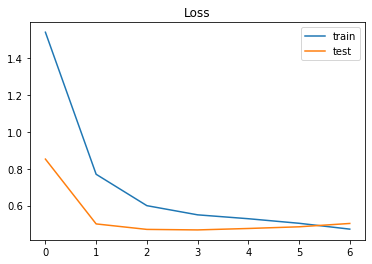

In [58]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

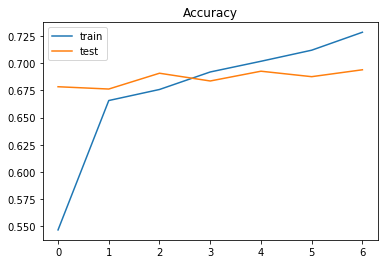

In [59]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

#### Predict

In [0]:
labels = data['Label'].unique()

In [71]:
new_sms = ['Hi Customer, Booking ID: WONQVSS. Seats: GOLD-D3,D4, 2 seat(s) for Miss Peregrines Home for Peculiar Children on 2012-04-17 0:11 at Rex Theatre: Brigade Road. Please carry your CC/DC card which was used for booking tickets.']
seq = tokenizer.texts_to_sequences(new_sms)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
#labels = ['Appointment', 'Flight', 'Cab', 'Bus', 'Payment','Hotel', 'Delivery', 'bank', 'bill','Reservation', 'ham', 'spam', 'info','PickUp',  'Movie', 'Train','Expiry', ]
print(np.argmax(pred))

7
